In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_excel("file:///home/inrx/Documents/LJ-Survey-Analysis/LandingJobs_Surey_RawData.xlsx", 
                         sheet_name=1)

In [3]:
pd.options.display.max_info_rows = len(raw_data)
pd.options.display.max_rows = len(raw_data)

In [4]:
pd.options.display.max_info_columns = len(raw_data.columns)
pd.options.display.max_columns = len(raw_data.columns)

In [17]:
display(raw_data.head())
print(raw_data.shape)
print(raw_data.columns.tolist())

,ID,Employment_Status,Employment_Status_Aggregated,Work_as_Contractor_12m,Work_as_Perm,Residence_Country,Residence_District,Residence_District_Aggregated,Work_Company_Country,Work_Company_Continent,Work_Company_PT_International,Work_Company_PT_District,Work_Company_PT_District_Aggregated,Remote_Working_Current,Remote_Working_Current_Flexible_Office_Days,Remote_Working_due_to_Covid,Job_Remote_or_Office,Remote_Work_Opinion,Job_Role_Original,Job_Role_Other,Job_Role,Employer_Industry,Employer_Industry_Other,Employer_Org_Type,Employer_Org_Type_Other,Employer_Size,Language_JavaScript,Language_Bash/Shell/PowerShell,Language_SQL,Language_Java,Language_C#,Language_Python,Language_PHP,Language_C++,Language_C,Language_TypeScript,Language_Ruby,Language_Swift,Language_Objective-C,Language_VB.NET,Language_Assembly,Language_R,Language_Perl,Language_VBA,Language_Matlab,Language_Go,Language_Scala,Language_Groovy,Language_Coffee Script,Language_Visual Basic 6,Language_Lua,Language_Haskell,Language_HTML/CSS,Language_Kotlin,Language_Rust,Language_Elixir,Language_Clojure,Language_WebAssembly,Language_Dart,Language_Languages_N/A,Language_Languages_Other,Framework_jQuery,Framework_.NET,Framework_Angular/Angular.js,Framework_Ruby on Rails,Framework_React,Framework_Django,Framework_Laravel,Framework_Spring,Framework_Vue.js,Framework_Express,Framework_Meteor,Framework_Flask,Framework_Ember.js,Framework_Drupal,Framework_OutSystems,Framework_Framework_N/A,Framework_Framework_Other,Contractor_Avg_Project,Contractor_Avg_Project_Intervals,Contractor_Avg_Hour_Rate,Contractor_Avg_Annual_Salary,Perm_Current_Company_how_long,Perm_GAS,Perm_GAS_Avg,Perm_GAS_Low_Limit,Perm_GAS_High_Limit,Avg_Salary,Salary_Change,Salary_Fairness,Changing_Jobs_next_6_months,Job_Motivator_Work_life_balance,Job_Motivator_Compensation_and_benefits,Job_Motivator_Training/Development_programs_at_work,Job_Motivator_Career_growth_opportunities,Job_Motivator_Remote_working,Job_Motivator_Flexible_schedule,Job_Motivator_Company_culture,Job_Motivator_The_technologies_I'm_working_with,Job_Motivator_Versatility/Variety_of_projects,Job_Motivator_Freedom_to_choose_the_clients_and/or_projects,Job_Motivator_Being_autonomous_at_work,Job_Motivator_How_widely_used_or_impactful_the_product/service_I_work_on_is,Job_Motivator_Environmentally_friendly/responsible_work_practice,Job_Perk_Meals_allowance/Company_provided_meals_or_snacks,Job_Perk_Transportation_benefit,Job_Perk_Health_benefits,Job_Perk_Fitness_or_wellness_benefit_(ex._gym_membership),Job_Perk_Computer/_Office_equipment_allowance,Job_Perk_Professional_development_sponsorship,Job_Perk_Annual_bonus,Job_Perk_Long-term_leave,Job_Perk_Parental_leave,Job_Perk_Stock_options_or_shares,Job_Perk_Education_sponsorship,Job_Perk_Child_care,Citizenship,Birth_Year,Age,Gender,English_Level,Way_Into_Tech,Way_Into_Tech_Other,Education_Level,Working_Experience,Working_Experience_Aggregated
0,1,Employed full-time,Permanent Employee,1.0,NaN,Portugal,Santarém,Centre,Portugal,Europe,Portugal,Lisboa,Lisbon Metropolitan Area,"Yes, fully remote",NaN,Working remote because of Covid-19,Full Office Job,6.0,Technical Team Leader,NaN,Technical Team Leader,Financial and banking,NaN,Corporate,NaN,1000 - 4.999 employees,NaN,NaN,SQL,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,More than 3 years,€30.000 - €35.000,32500.0,30000.0,35000.0,32500,Hasn't changed,4,4.0,6,7,6,7,7,7,4,4,5,1,4,5,5,1,7,7,3,7,4,5,4,6,2,7,7,Portuguese,1984.0,37.0,Male,Full professional proficiency,University,NaN,NaN,More than 9 years,6+ years
1,2,Employed full-time,Permanent Employee,0.0,NaN,Portugal,Coimbra,Centre,Portugal,Europe,Portugal,Coimbra,Centre,"Yes, fully remote",NaN,Working remote because of Covid-19,Full Office Job,7.0,Full-Stack Developer,NaN,Full-Stack Developer,Software development - other,NaN,SME - Small or Medium Enterprise (

(3371, 126)
['ID', 'Employment_Status', 'Employment_Status_Aggregated', 'Work_as_Contractor_12m', 'Work_as_Perm', 'Residence_Country', 'Residence_District', 'Residence_District_Aggregated', 'Work_Company_Country', 'Work_Company_Continent', 'Work_Company_PT_International', 'Work_Company_PT_District', 'Work_Company_PT_District_Aggregated', 'Remote_Working_Current', 'Remote_Working_Current_Flexible_Office_Days', 'Remote_Working_due_to_Covid', 'Job_Remote_or_Office', 'Remote_Work_Opinion', 'Job_Role_Original', 'Job_Role_Other', 'Job_Role', 'Employer_Industry', 'Employer_Industry_Other', 'Employer_Org_Type', 'Employer_Org_Type_Other', 'Employer_Size', 'Language_JavaScript', 'Language_Bash/Shell/PowerShell', 'Language_SQL', 'Language_Java', 'Language_C#', 'Language_Python', 'Language_PHP', 'Language_C++', 'Language_C', 'Language_TypeScript', 'Language_Ruby', 'Language_Swift', 'Language_Objective-C', 'Language_VB.NET', 'Language_Assembly', 'Language_R', 'Language_Perl', 'Language_VBA', 'Langu

In [7]:
raw_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3371 entries, 0 to 3370
Data columns (total 126 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   ID                                                                           3371 non-null   int64  
 1   Employment_Status                                                            3371 non-null   object 
 2   Employment_Status_Aggregated                                                 3371 non-null   object 
 3   Work_as_Contractor_12m                                                       3166 non-null   float64
 4   Work_as_Perm                                                                 205 non-null    float64
 5   Residence_Country                                                            3371 non-null   object 
 6   Residence_District                     

### Gender Gap in Tech
Male respondentes represent 86% of all respondentes. This happens because 1) there are more men then women in Tech, something that is nown and documented. It could also represent that 2) the survey communication might not target correctly enough women to answer or 3) women are less prone or less available to answer. <br>
According to Portuguese Statistics Institute, Male workers represent 66.1% of the workforce in CIT Activities. This might mean that 2) and 3) might be closer to such a big difference between the number of male and female respondentes.

In [37]:
not_freelance = raw_data[raw_data["Employment_Status"]!="Working as a Contractor/Freelancer"]

In [43]:
print(not_freelance.Gender.value_counts()/len(not_freelance)*100)

Male                   85.881238
Female                 12.697410
I prefer not to say     1.421352
Name: Gender, dtype: float64


In [46]:
# INE DATA Male % in CIT
98.2/148.6 * 100

66.0834454912517

Male                   85.998220
Female                 12.518540
I prefer not to say     1.483239
Name: Gender, dtype: float64


<AxesSubplot:>

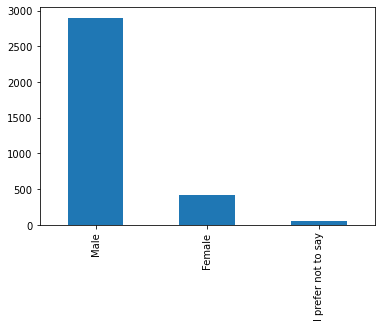

In [44]:
print(raw_data.Gender.value_counts()/len(raw_data)*100)
raw_data.Gender.value_counts().plot.bar()

#### Gender Pay Gap

In average, a women, in her Tech career receives -2.61 % then her male counterparts. 

##### by Working Experience
Female employees in the tech industry receive, in general, less then man. The only exception seams to be in the 0 to 3 years of experience category, where women receive 5% more then man.
Otherwise, women are receiveing less for the same experience level, being the pay gap higher, the higher is the experience level. 

##### by Age
Younger women are beter paid then men with the same age, by about 10%. This surplus in favour to women inverts after age 25. Is this due to the _"motherwood factor"_ ? Are employers paying less because women are mothers, or might be in the near future? 

##### by Job Role
Only in Business Applications (BI/CRM/ERP), CTO, Front-End Developer, Maintenance & Support, Quality Assurance/Testing, Scrum Master Job Roles women are better paid. 


_All this analysis might be very biased due to the unbalance between the difference between the number of male and female respondents_

In [196]:
[col for col in raw_data.columns.tolist() if col.find('Role')>0]

['Job_Role_Original', 'Job_Role_Other', 'Job_Role']

In [203]:
re_index = ['0 Years', '0 - 3 years', '3 - 6 years', '6+ years']

salary_relevant_col = ['Avg_Salary', 'Age', 'Working_Experience_Aggregated', 'Job_Role']

In [204]:
female_salary = not_freelance[not_freelance['Gender']=='Female'][salary_relevant_col]
male_salary = not_freelance[not_freelance['Gender']=='Male'][salary_relevant_col]

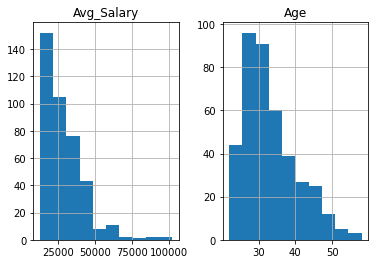

In [205]:
female_salary.hist();

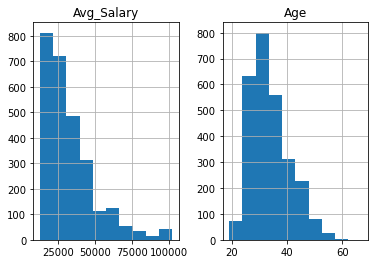

In [206]:
male_salary.hist();

In [190]:
fAvgSalary_byExp = female_salary.groupby('Working_Experience_Aggregated')['Avg_Salary'].mean()
fAvgSalary_byExp = fAvgSalary_byExp.reindex(index = re_index)

mAvgSalary_byExp = male_salary.groupby('Working_Experience_Aggregated')['Avg_Salary'].mean()
mAvgSalary_byExp = mAvgSalary_byExp.reindex(index = re_index)

salaryGenderGap_byExp = (fAvgSalary_byExp - mAvgSalary_byExp) / mAvgSalary_byExp * 100

salaryGenderGap_byExp

Working_Experience_Aggregated
0 Years        -1.818182
0 - 3 years     5.450570
3 - 6 years   -12.001766
6+ years      -13.551221
Name: Avg_Salary, dtype: float64

In [174]:
fAvgSalary_byAge = female_salary.groupby('Age')['Avg_Salary'].mean()

mAvgSalary_byAge = male_salary.groupby('Age')['Avg_Salary'].mean()

salaryGenderGap_byAge = (fAvgSalary_byAge - mAvgSalary_byAge) / mAvgSalary_byAge * 100

print('Youger women receive more then men',salaryGenderGap_byAge[range(22,25)].mean())
print('Best Age to be a Woman',salaryGenderGap_byAge[salaryGenderGap_byAge > 1].index.tolist())

-2.613150897930711
Youger women receive more then men 10.239314064228173
Best Age to be a Woman [22.0, 23.0, 24.0, 27.0, 40.0, 57.0, 58.0]


In [209]:
fAvgSalary_byJob_Role = female_salary.groupby('Job_Role')['Avg_Salary'].mean()

mAvgSalary_byJob_Role = male_salary.groupby('Job_Role')['Avg_Salary'].mean()

salaryGenderGap_byJob_Role = (fAvgSalary_byJob_Role - mAvgSalary_byJob_Role) / mAvgSalary_byJob_Role * 100

In [215]:
# excluding CTO there are less respondentes
avg_JobRole_diff = salaryGenderGap_byJob_Role[salaryGenderGap_byJob_Role.index!='CTO'].mean()

In [223]:
worst_JobRoles_female = salaryGenderGap_byJob_Role[salaryGenderGap_byJob_Role<avg_JobRole_diff].index.tolist()
best_JobRoles_female = salaryGenderGap_byJob_Role[salaryGenderGap_byJob_Role>0].index.tolist()

In [226]:
print('Average salary difference, excluding CTO level',avg_JobRole_diff)
print('Worst Job Roles for women: ',', '.join(worst_JobRoles_female))
print('Best Job Roles for women: ',', '.join(best_JobRoles_female))

Average salary difference, excluding CTO level -13.074980564084914
Worst Job Roles for women:  Computer & Network Security, DevOps Engineer, Full-Stack Developer, Mobile Apps Developer, Product Owner/Product Manager, Project Manager, Solutions Architect, SysAdmin Engineer, UX/UI Designer
Best Job Roles for women:  Business Applications (BI/CRM/ERP), CTO, Front-End Developer, Maintenance & Support, Quality Assurance/Testing, Scrum Master
